In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

df=pd.read_csv("star_classification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [2]:
df.head

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [82]:
df.head()
print(len(df))
for i in df.columns:
    print(i,len(df[i].unique()))

100000
obj_ID 78053
alpha 99999
delta 99999
u 93748
g 92651
r 91901
i 92019
z 92007
run_ID 430
rerun_ID 1
cam_col 6
field_ID 856
spec_obj_ID 100000
class 3
redshift 99295
plate 6284
MJD 2180
fiber_ID 1000


In [83]:
a=df.isnull().sum()
a.head()

obj_ID    0
alpha     0
delta     0
u         0
g         0
dtype: int64

In [85]:
df.describe([0.01,0.1,0.25,0.5,0.75,0.99])

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
1%,1.237649e+18,2.172928,-9.224743,17.142674,15.829114,15.227630,14.918110,14.663328,756.000000,301.0,1.000000,16.000000,4.391793e+17,-0.000844,390.000000,51877.000000,10.000000
10%,1.237654e+18,23.783165,-0.659503,19.117051,17.757718,17.009738,16.619008,16.341922,2076.000000,301.0,1.000000,46.000000,1.320828e+18,-0.000101,1173.000000,52751.000000,90.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
99%,1.237680e+18,357.980799,65.142702,26.657341,24.637623,22.794967,22.158517,22.365484,8116.000000,301.0,6.000000,774.010000,1.273962e+19,3.127080,11315.000000,58485.000000,986.000000


C:\Users\gina1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

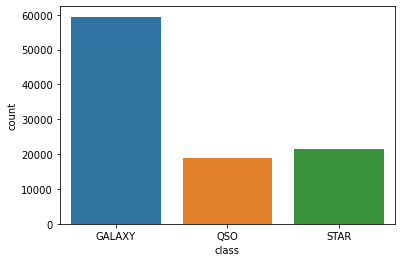

In [86]:
sns.countplot(df["class"])

## 標準化

In [3]:
#標準化
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df2=df.drop("class",1)

X = pd.DataFrame(min_max.fit_transform(df2),columns=df2.keys()) 

y = df["class"]

X

C:\Users\gina1\AppData\Local\Temp/ipykernel_15972/445858326.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df.drop("class",1)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,0.434203,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.434248,0.0,0.2,0.069530,0.451585,0.091831,0.451592,0.648007,0.170170
1,0.547496,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.547498,0.0,0.8,0.110429,0.828833,0.112389,0.828841,0.894320,0.426426
2,0.434203,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.434248,0.0,0.2,0.111452,0.350946,0.093170,0.350949,0.543965,0.298298
3,0.506985,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.507016,0.0,0.4,0.207566,0.723313,0.134210,0.723312,0.878072,0.774775
4,0.992503,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.992549,0.0,0.4,0.128834,0.476759,0.017959,0.476753,0.625205,0.841842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.952256,0.110044,0.159072,0.998942,0.999140,0.611752,0.522045,0.999138,0.952316,0.0,0.2,0.582822,0.741627,0.001420,0.741633,0.838476,0.437437
99996,0.969500,0.081913,0.379072,0.998994,0.999081,0.538130,0.453770,0.999006,0.969577,0.0,0.0,0.284254,0.599304,0.059087,0.599300,0.727198,0.865866
99997,0.646323,0.623848,0.338810,0.998842,0.998771,0.424420,0.362588,0.998800,0.646343,0.0,0.6,0.303681,0.203399,0.021839,0.203404,0.399645,0.073073
99998,0.439698,0.589629,0.642974,0.999259,0.999007,0.510982,0.423554,0.998927,0.439712,0.0,0.6,0.122699,0.528049,0.066229,0.528051,0.649918,0.469469


## > 特徵篩選


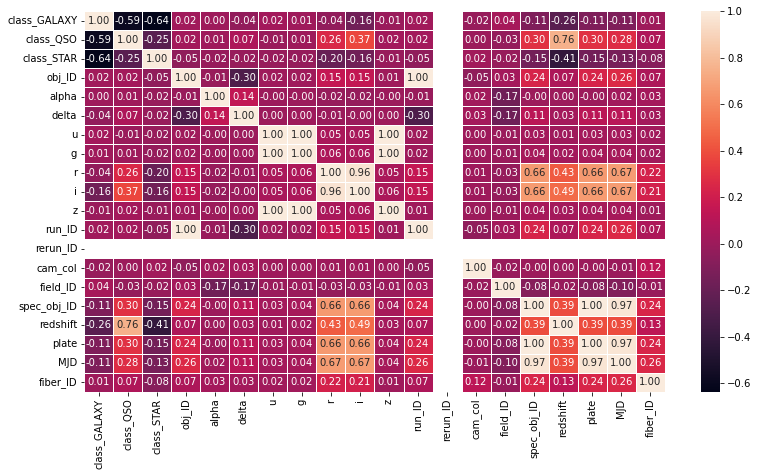

In [24]:
# 特徵篩選 heatmap

Class=pd.get_dummies(df["class"],prefix="class") #拆分類別 看相關係數

df3=pd.concat([Class,X],axis=1)

plt.figure(figsize=(13,7))
sns.heatmap(df3.corr(), annot=True, linewidths=0.5, fmt= '.2f')
plt.show()

[0.02139547 0.02713128 0.02273868 0.07141758 0.06951708 0.04140716
 0.05674211 0.05620192 0.02031201 0.         0.01245188 0.01330466
 0.05182416 0.42619163 0.05241191 0.04579768 0.01115478]


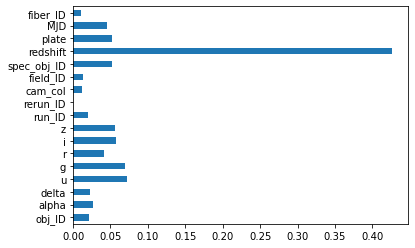

In [92]:
#重要性
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [4]:
#去除不重要的特徵
df2 = X.drop(["alpha","run_ID","cam_col","field_ID","fiber_ID",
                "obj_ID","rerun_ID","spec_obj_ID"], axis = 1)
                                       #因為spec_obj_ID是星體編號
df2

,delta,u,g,r,i,z,redshift,plate,MJD
0,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.091831,0.451592,0.648007
1,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.112389,0.828841,0.894320
2,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.093170,0.350949,0.543965
3,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.134210,0.723312,0.878072
4,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.017959,0.476753,0.625205
...,...,...,...,...,...,...,...,...,...
99995,0.159072,0.998942,0.999140,0.611752,0.522045,0.999138,0.001420,0.741633,0.838476
99996,0.379072,0.998994,0.999081,0.538130,0.453770,0.999006,0.059087,0.599300,0.727198
99997,0.338810,0.998842,0.998771,0.424420,0.362588,0.998800,0.021839,0.203404,0.399645
99998,0.642974,0.999259,0.999007,0.510982,0.423554,0.998927,0.066229,0.528051,0.649918


## > 拆分資料、Oversampling

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size = 0.2, random_state = 0)

In [6]:
#因為種類不平均 用BorderlineSMOTE Resampling

from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE()
x_re, y_re = bsmote.fit_resample(x_train, y_train)

print('Resampling dataset: ', Counter(y_re))


Resampling dataset:  Counter({'GALAXY': 47594, 'STAR': 47594, 'QSO': 47594})


## Random forest

In [95]:
#Random forest+GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 

rfc=RandomForestClassifier()


from sklearn.model_selection import ShuffleSplit


single_split_cv = ShuffleSplit(n_splits=5)

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
}

GCV_rfc =GridSearchCV(estimator=rfc, param_grid=param_grid, cv=single_split_cv)
GCV_rfc.fit(x_re, y_re)

print(GCV_rfc.best_params_)

#得出最佳結果為{'max_depth': 8, 'n_estimators': 200}



KeyboardInterrupt: 

In [47]:
#查看結果
from sklearn.metrics import confusion_matrix
predict = GCV_rfc.predict(x_test)
print(confusion_matrix(y_test, predict))

print(classification_report(predict,y_test))


[[10896   855   100]
 [  119  3715     1]
 [    2     0  4312]]
              precision    recall  f1-score   support

      GALAXY       0.92      0.99      0.95     11017
         QSO       0.97      0.81      0.88      4570
        STAR       1.00      0.98      0.99      4413

    accuracy                           0.95     20000
   macro avg       0.96      0.93      0.94     20000
weighted avg       0.95      0.95      0.94     20000



## KNeighbors

In [7]:
#KNearest

from sklearn.neighbors import KNeighborsClassifier

knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_re, y_re)

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_re, y_re)

knn7=KNeighborsClassifier(n_neighbors=7)
knn7.fit(x_re, y_re)
print("n=3")
print(knn3.score(x_re, y_re))
print(knn3.score(x_test, y_test))
print("n=5")
print(knn5.score(x_re, y_re))
print(knn5.score(x_test, y_test))

print("n=7")
print(knn7.score(x_re, y_re))
print(knn7.score(x_test, y_test))



n=3
0.9801235449846619
0.92985
n=5
0.9723284447619448
0.9235
n=7
0.9661021697412839
0.9179


In [75]:
predict = knn3.predict(x_test)
print(confusion_matrix(y_test, predict))

print(classification_report(predict,y_test))


[[10870   543   438]
 [  248  3563    24]
 [  151    12  4151]]
              precision    recall  f1-score   support

      GALAXY       0.92      0.96      0.94     11269
         QSO       0.93      0.87      0.90      4118
        STAR       0.96      0.90      0.93      4613

    accuracy                           0.93     20000
   macro avg       0.94      0.91      0.92     20000
weighted avg       0.93      0.93      0.93     20000



array(['GALAXY', 'QSO', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

In [52]:
predict = knn5.predict(x_test)
print(confusion_matrix(y_test, predict))

print(classification_report(predict,y_test))


[[10689   624   538]
 [  224  3584    27]
 [  115    15  4184]]
              precision    recall  f1-score   support

      GALAXY       0.90      0.97      0.93     11028
         QSO       0.93      0.85      0.89      4223
        STAR       0.97      0.88      0.92      4749

    accuracy                           0.92     20000
   macro avg       0.94      0.90      0.92     20000
weighted avg       0.92      0.92      0.92     20000



## XGBoost (1)

In [8]:
#XGBoost+StratifiedKFold


#先把類別轉為編號
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_re = le.fit_transform(y_re)


In [69]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


params = {
        'num_boost_round':[1000],
        'learning_rate':[0.1],
        'silent':[0],
        'objective':['multi:softmax'],
        'eval_metric':['merror','mlogloss'],
        'gamma':[i/10.0 for i in range(0,5)],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
from sklearn.model_selection import RandomizedSearchCV
folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1', n_jobs=1, cv=skf.split(x_re, y_re), verbose=3, random_state=1 )

random_search.fit(x_re, y_re)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[12:21:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 1/3] END colsample_bytree=0.6, eval_metric=merror, gamma=0.1, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 2.4min
[12:23:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 2/3] END colsample_bytree=0.6, eval_metric=merror, gamma=0.1, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 2.3min
[12:26:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 3/3] END colsample_bytree=0.6, eval_metric=merror, gamma=0.1, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 2.4min
[12:28:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 1/3] END colsample_bytree=1.0, eval_metric=merror, gamma=0.4, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=1.0;, score=nan total time= 3.7min
[12:32:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 2/3] END colsample_bytree=1.0, eval_metric=merror, gamma=0.4, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=1.0;, score=nan total time= 3.7min
[12:35:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 3/3] END colsample_bytree=1.0, eval_metric=merror, gamma=0.4, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=1.0;, score=nan total time= 3.6min
[12:39:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 1/3] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=0.0, learning_rate=0.1, max_depth=5, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 2.9min
[12:42:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 2/3] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=0.0, learning_rate=0.1, max_depth=5, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 3.0min
[12:45:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 3/3] END colsample_bytree=0.6, eval_metric=mlogloss, gamma=0.0, learning_rate=0.1, max_depth=5, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 2.9min
[12:48:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 1/3] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0.1, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 3.2min
[12:51:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 2/3] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0.1, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 3.0min
[12:54:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 3/3] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0.1, learning_rate=0.1, max_depth=4, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.6;, score=nan total time= 3.0min
[12:57:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 1/3] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0.1, learning_rate=0.1, max_depth=3, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.8;, score=nan total time= 2.3min
[12:59:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 2/3] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0.1, learning_rate=0.1, max_depth=3, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.8;, score=nan total time= 2.3min
[13:02:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

[CV 3/3] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0.1, learning_rate=0.1, max_depth=3, num_boost_round=1000, objective=multi:softmax, silent=0, subsample=0.8;, score=nan total time= 2.3min
[13:04:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "num_boost_round", "silent" } are not used.



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002A796465430>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_...
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eval_metric': ['merror', 'mlogloss'],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1],
                                        'max_depth': [3, 4, 5],
                                        'num_boost_round': [1000],
                                        'objective': ['multi:softmax'],
                                        'silent': [0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1, scoring='f1', verbose=3)

In [70]:
random_search.best_params_

{'subsample': 0.6,
 'silent': 0,
 'objective': 'multi:softmax',
 'num_boost_round': 1000,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'eval_metric': 'merror',
 'colsample_bytree': 0.6}

In [76]:
y_test_en = le.fit_transform(y_test) #把測試資料答案類別轉為編號


predict = random_search.predict(x_test)
#predict
print(confusion_matrix(y_test_en, predict))

print(classification_report(predict,y_test_en))


[[11408   431    12]
 [  141  3693     1]
 [    1     0  4313]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     11550
           1       0.96      0.90      0.93      4124
           2       1.00      1.00      1.00      4326

    accuracy                           0.97     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000



## XGBoost (2)

### 因為以上三種方法xgb的結果最好，嘗試調整參數看是否還能更好
### > 配合grid search 逐一找尋最佳參數

In [10]:
#調整順序參考文章 :　https://www.cnblogs.com/Allen-rg/p/10563362.html


#1　首先決定n_estimators
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

par = {'n_estimators': [300,400, 500, 600, 700, 800]}
xgb2 = XGBClassifier(objective='multi:softmax' )
CV_XG =GridSearchCV(estimator=xgb2, param_grid=par,scoring='f1')
CV_XG.fit(x_re, y_re)

C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None, ...),
             param_grid={'n_estimators': [300, 400, 500, 600, 700, 800]},
             scoring='f1')

In [14]:
print(CV_XG.best_params_)
predict = CV_XG.predict(x_test)

print(confusion_matrix(y_test_en, predict))

print(classification_report(predict,y_test_en))


{'n_estimators': 300}
[[11517   323    11]
 [  168  3666     1]
 [    2     0  4312]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11687
           1       0.96      0.92      0.94      3989
           2       1.00      1.00      1.00      4324

    accuracy                           0.97     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [16]:
#接著決定max_depth 還有 min_child_weight

params = {'max_depth': [ 4, 5, 6, 7, 8, 9], 'min_child_weight': [1, 2, 3, 4, 5, 6]}

xgb2 = XGBClassifier(objective='multi:softmax',n_estimators=300)
CV_XG =GridSearchCV(estimator=xgb2, param_grid=params,scoring='f1')
CV_XG.fit(x_re, y_re)

C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None, ...),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_child_weight': [1, 2, 3, 4, 5, 6]},
             scoring='f1')

In [17]:
print(CV_XG.best_params_)
predict = CV_XG.predict(x_test)

print(confusion_matrix(y_test_en, predict))

print(classification_report(predict,y_test_en))


{'max_depth': 4, 'min_child_weight': 1}
[[11440   400    11]
 [  158  3676     1]
 [    1     0  4313]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11599
           1       0.96      0.90      0.93      4076
           2       1.00      1.00      1.00      4325

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [20]:
#gamma
params = {'gamma':[i/10.0 for i in range(0,10)]}
xgb2 = XGBClassifier(objective='multi:softmax',n_estimators=300)
CV_XG =GridSearchCV(estimator=xgb2, param_grid=params,scoring='f1')
CV_XG.fit(x_re, y_re)

C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None, ...),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]},
             scoring='f1')

In [21]:
print(CV_XG.best_params_)
predict = CV_XG.predict(x_test)

print(confusion_matrix(y_test_en, predict))

print(classification_report(predict,y_test_en))


{'gamma': 0.0}
[[11517   323    11]
 [  168  3666     1]
 [    2     0  4312]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11687
           1       0.96      0.92      0.94      3989
           2       1.00      1.00      1.00      4324

    accuracy                           0.97     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [22]:
#調整subsample 和 colsample_bytree

params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
xgb2 = XGBClassifier(objective='multi:softmax',n_estimators=300,gamma=0)
CV_XG =GridSearchCV(estimator=xgb2, param_grid=params,scoring='f1')
CV_XG.fit(x_re, y_re)

C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\gina1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='f1')

In [23]:
print(CV_XG.best_params_)
predict = CV_XG.predict(x_test)

print(confusion_matrix(y_test_en, predict))

print(classification_report(predict,y_test_en))



{'colsample_bytree': 0.6, 'subsample': 0.6}
[[11510   329    12]
 [  175  3659     1]
 [    2     0  4312]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11687
           1       0.95      0.92      0.94      3988
           2       1.00      1.00      1.00      4325

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000

